In [1]:
!pip install --upgrade Pandas

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


### Data Analysis Exploration (DAE)

In [3]:
# import the csv files using pandas 
bike_df = pd.read_csv('datasets/bike_sharing_daily.csv')

In [4]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  casual      731 non-null    int64  
 13  registered  731 non-null    int64  
 14  cnt         731 non-null    int64  
dtypes: float64(3), int64(11), object(1)
memory usage: 85.8+ KB


In [5]:
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,331,654,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,131,670,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,82,1518,1600


In [6]:
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [8]:
bike_df['casual'].mean()

848.1764705882352

In [9]:
bike_df['registered'].mean()

3656.172366621067

In [10]:
bike_df['cnt'].mean()

4504.3488372093025

In [11]:
# data cleaning
bike_df = bike_df.drop(labels = ['instant', 'casual', 'registered'], axis = 1)
bike_df

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1/1/2011,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
1,1/2/2011,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2,1/3/2011,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
3,1/4/2011,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
4,1/5/2011,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
726,12/27/2012,1,1,12,0,4,1,2,0.254167,0.652917,0.350133,2114
727,12/28/2012,1,1,12,0,5,1,2,0.253333,0.590000,0.155471,3095
728,12/29/2012,1,1,12,0,6,0,2,0.253333,0.752917,0.124383,1341
729,12/30/2012,1,1,12,0,0,0,1,0.255833,0.483333,0.350754,1796


In [12]:
bike_df['dteday'] = pd.to_datetime(bike_df['dteday'], format = '%m/%d/%Y')
bike_df.index = pd.DatetimeIndex(bike_df['dteday'])
bike_df = bike_df.drop(labels = ['dteday'], axis = 1)
bike_df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
dteday,,,,,,,,,,,
2011-01-01,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
2011-01-02,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2011-01-03,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
2011-01-04,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
2011-01-05,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...
2012-12-27,1,1,12,0,4,1,2,0.254167,0.652917,0.350133,2114
2012-12-28,1,1,12,0,5,1,2,0.253333,0.590000,0.155471,3095
2012-12-29,1,1,12,0,6,0,2,0.253333,0.752917,0.124383,1341


In [ ]:
# visualization

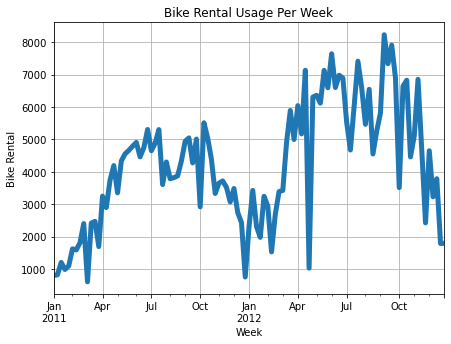

In [15]:
plt.figure(figsize = (7, 5))
# the index of this DataFrame is a PeriodIndex.
# dataframe.asfreq() function is used to convert TimeSeries to specified frequency
# it returns the original data conformed to a new index with the specified frequency
bike_df['cnt'].asfreq('W').plot(linewidth = 5)
plt.title('Bike Rental Usage Per Week')
plt.xlabel('Week')
plt.ylabel('Bike Rental')
plt.grid()

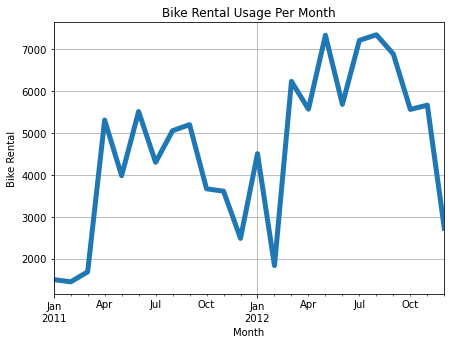

In [16]:
plt.figure(figsize = (7, 5))
bike_df['cnt'].asfreq('M').plot(linewidth = 5)
plt.title('Bike Rental Usage Per Month')
plt.xlabel('Month')
plt.ylabel('Bike Rental')
plt.grid()

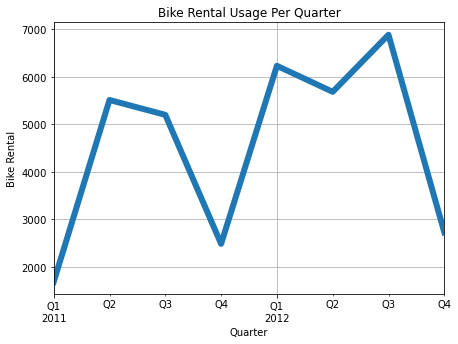

In [20]:
plt.figure(figsize = (7, 5))
bike_df['cnt'].asfreq('Q').plot(linewidth = 6)
plt.title('Bike Rental Usage Per Quarter')
plt.xlabel('Quarter')
plt.ylabel('Bike Rental')
plt.grid()

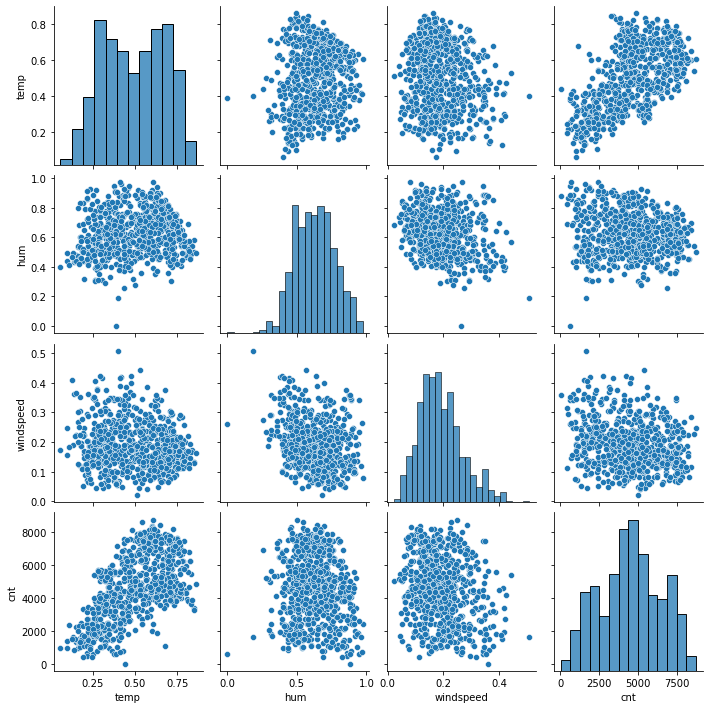

In [18]:
sns.pairplot(bike_df[['temp', 'hum', 'windspeed', 'cnt']])

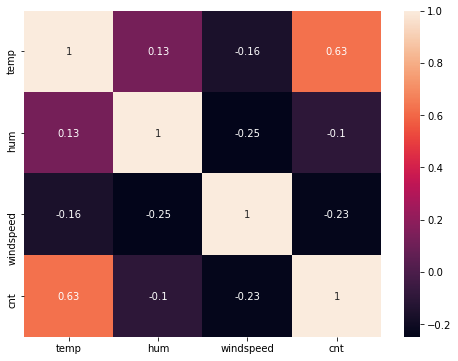

In [19]:
plt.figure(figsize = (8, 6))
sns.heatmap(bike_df[['temp', 'hum', 'windspeed', 'cnt']].corr(), annot = True);

In [24]:
# selecting columns and transform using one hot encoding
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
x_cat = onehotencoder.fit_transform(bike_df[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']]).toarray()
x_cat

array([[1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.]])

In [25]:
x_cat.shape

(731, 32)

In [27]:
x_cat = pd.DataFrame(x_cat)
x_cat.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [32]:
x_numerical = bike_df[['temp', 'hum', 'windspeed', 'cnt']].reset_index()
x_all = pd.concat([x_cat, x_numerical], axis = 1)
x_all = x_all.drop('dteday', axis = 1)
x_all

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,temp,hum,windspeed,cnt
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.344167,0.805833,0.160446,985
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.363478,0.696087,0.248539,801
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.196364,0.437273,0.248309,1349
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.200000,0.590435,0.160296,1562
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.226957,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.254167,0.652917,0.350133,2114
727,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.253333,0.590000,0.155471,3095
728,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.253333,0.752917,0.124383,1341
729,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.255833,0.483333,0.350754,1796


### Preparing the training and test datasets

In [33]:
x = x_all.iloc[:, :-1].values # remove last column (features)
y = x_all.iloc[:, -1:].values # takes last column (target)

In [36]:
x.shape

(731, 35)

In [37]:
y.shape

(731, 1)

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [39]:
x_train.shape

(584, 35)

In [40]:
y_train.shape

(584, 1)

### Train the model (XGBoost regressor model)

In [47]:
!pip install xgboost

     |████████████████████████████████| 173.6 MB 4.2 kB/s             ██████       | 136.1 MB 5.3 MB/s eta 0:00:08 


In [59]:
import xgboost as xgb

model = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 1, max_depth = 20, n_estimators = 500)

model.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=1, max_delta_step=0,
             max_depth=50, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=2,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

### Model metrics

In [60]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

In [61]:
# predict the score of the trained model using the testing dataset
result = model.score(x_test, y_test)
print("Accuracy : {}".format(result))

Accuracy : 0.8232170214691257


In [62]:
# make predictions on the test data
y_predict = model.predict(x_test)
y_predict

array([ 4834.8335 ,  1003.9193 ,  4554.4243 ,  5253.215  ,  3128.0063 ,
        3134.8586 ,  4675.1675 ,  2055.5803 ,  4724.1914 ,  6758.583  ,
        4536.046  ,  5406.788  ,  3611.5059 ,  7019.31   ,  2006.8522 ,
        4176.118  ,  5527.937  ,  1910.3315 ,  1633.1672 ,  6665.954  ,
        4254.391  ,  4260.6777 ,  5211.8804 ,  4898.855  ,  4316.0317 ,
        6947.78   ,  4141.204  ,  8214.196  ,  2457.4497 ,  3770.6948 ,
        4196.439  ,  6039.3496 ,  4607.6714 ,  1481.251  ,  5034.1816 ,
        4553.9316 ,  6588.024  ,  2879.9277 ,  1018.19336,  4072.1511 ,
        3842.575  ,  4472.9897 ,  2443.1943 ,  4590.155  ,  7454.695  ,
        7636.3525 ,  2519.1064 ,  3294.248  ,  6914.7817 ,  5819.87   ,
        6593.6763 ,  2374.5503 ,  4679.3374 ,  1681.7811 ,  4743.0786 ,
        7718.732  ,  6500.8003 ,  2157.23   ,  1870.5795 ,  4464.871  ,
        7177.4463 ,  7784.8203 ,  2717.5044 ,  1156.524  ,  4431.3267 ,
        7767.608  ,  4508.9834 ,  3539.5862 ,  5933.078  ,  7426

In [63]:
k = x_test.shape[1]
n = len(x_test)
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 837.546 
MSE = 701482.7320628582 
MAE = 613.5476173867985 
R2 = 0.8232170214691257 
Adjusted R2 = 0.7674746408512825


### Hyperparameter Optimization with GridSearchCV

In [64]:
from sklearn.model_selection import GridSearchCV

In [65]:
parameters_grid = { 'max_depth': [3, 6, 10], 
                   'learning_rate': [0.01, 0.05, 0.1],
                   'n_estimators': [100, 500, 1000],
                   'colsample_bytree': [0.3, 0.7]}

In [66]:
model = xgb.XGBRegressor()

In [67]:
xgb_gridsearch = GridSearchCV(estimator = model, 
                              param_grid = parameters_grid, 
                              scoring = 'neg_mean_squared_error',  
                              cv = 5, 
                              verbose = 5)

In [68]:
xgb_gridsearch.fit(x_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV 1/5] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.4s
[CV 2/5] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.4s
[CV 3/5] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.4s
[CV 4/5] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.4s
[CV 5/5] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.4s
[CV 1/5] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=500; total time=   1.7s
[CV 2/5] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=500; total time=   1.8s
[CV 3/5] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=500; total time=   1.7s
[CV 4/5] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=500; total time= 

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n...
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                 

In [69]:
xgb_gridsearch.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.05,
 'max_depth': 3,
 'n_estimators': 500}

In [70]:
xgb_gridsearch.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=2,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [71]:
y_predict = xgb_gridsearch.predict(x_test)

In [73]:
k = x_test.shape[1]
n = len(x_test)
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 637.099 
MSE = 405895.32238148944 
MAE = 480.11134556361606 
R2 = 0.8977089801607272 
Adjusted R2 = 0.8654550549861817


### Hyperparameter Optimization with RandomSearch

In [74]:
from sklearn.model_selection import RandomizedSearchCV

grid = {
    'n_estimators': [100, 500, 700],
    'max_depth': [2, 3, 5],
    'learning_rate': [0.1, 0.5, 1],
    'min_child_weight': [1, 2, 3]  
   }

model = xgb.XGBRegressor()

# Set up the random search 
random_cv = RandomizedSearchCV(estimator = model,
                               param_distributions = grid,
                               cv = 5, 
                               n_iter = 50,
                               scoring = 'neg_mean_absolute_error',
                               verbose = 5, 
                               return_train_score = True)
random_cv.fit(x_train, y_train)

random_cv.best_estimator_

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=500; total time=   2.1s
[CV 2/5] END learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=500; total time=   2.0s
[CV 3/5] END learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=500; total time=   2.1s
[CV 4/5] END learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=500; total time=   2.0s
[CV 5/5] END learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=500; total time=   2.0s
[CV 1/5] END learning_rate=0.1, max_depth=2, min_child_weight=3, n_estimators=500; total time=   1.8s
[CV 2/5] END learning_rate=0.1, max_depth=2, min_child_weight=3, n_estimators=500; total time=   1.7s
[CV 3/5] END learning_rate=0.1, max_depth=2, min_child_weight=3, n_estimators=500; total time=   1.8s
[CV 4/5] END learning_rate=0.1, max_depth=2, min_child_weight=3, n_estimators=500; total time=   1.7s
[CV 5/5] END learnin

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=3, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=2,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [75]:
y_predict = random_cv.predict(x_test)

In [76]:
k = x_test.shape[1]
n = len(x_test)
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 629.317 
MSE = 396040.12259830686 
MAE = 475.1189778645833 
R2 = 0.9001926215848923 
Adjusted R2 = 0.8687218265891377


### Hyperparameter Optimization with BayesianSearch

In [77]:
! pip install scikit-optimize
from skopt import BayesSearchCV
import xgboost as xgb

     |████████████████████████████████| 100 kB 7.2 MB/s            


In [78]:
model = xgb.XGBRegressor()
search_space = {
    "learning_rate": (0.01, 1.0, "log-uniform"),
    "max_depth": (1, 50),
    "n_estimators": (5, 500),
}

xgb_bayes_search = BayesSearchCV(model, 
                                 search_space, 
                                 n_iter = 50, 
                                 scoring = 'neg_mean_absolute_error', 
                                 cv = 5)

In [79]:
result = xgb_bayes_search.fit(x_train, y_train)

In [80]:
y_predict = xgb_bayes_search.predict(x_test)

In [81]:
k = x_test.shape[1]
n = len(x_test)
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 625.67 
MSE = 391462.78029759106 
MAE = 435.0671876660821 
R2 = 0.9013461727254831 
Adjusted R2 = 0.8702391100713562
